<a href="https://colab.research.google.com/github/ahmaddaniunnes/tugas/blob/main/PSD_Jobsheet_2_Ahmad_Dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filter memiliki 2 bentuk:
1. FIR (Finite Impulse Response)
2. IIR (Infinite Impulse Response)

Begitupula dengan window yang memiliki beberapa tipe. Salah satu jenis window sudah sempat dibahas pada Jobsheet 1 yaitu rectangle window.

<ipython-input-1-3e1e699456ce>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)


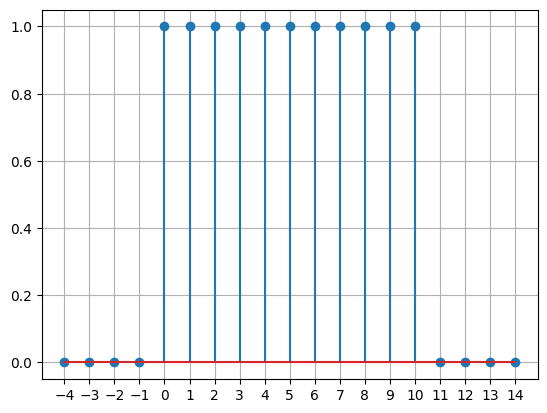

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

**Rectangle window** adalah jenis window yang paling sederhana dalam pemrosesan sinyal. Dalam rectangle window, semua sampel sinyal diberi bobot yang sama. Ini berarti bahwa setiap titik data dalam sinyal dianggap memiliki kontribusi yang sama pentingnya dalam analisis.

**Kelebihan Rectangle Window**:

- Sederhana: Mudah untuk dipahami dan diimplementasikan karena semua sampel sinyal diberi bobot yang sama.

- Memiliki lebar main lobe yang sempit: Ini bisa menjadi keuntungan dalam beberapa aplikasi di mana resolusi frekuensi yang tinggi diinginkan.

**Kekurangan Rectangle Window**:

- Tingkat side lobe yang tinggi: Rectangle window memiliki tingkat side lobe yang tinggi, yang dapat menyebabkan leakage spektral. Leakage ini terjadi ketika energi sinyal bocor ke frekuensi lain, yang dapat mengganggu analisis dan interpretasi spektral.

- Resolusi frekuensi yang rendah: Karena tingkat side lobe yang tinggi, rectangle window tidak efektif dalam memisahkan sinyal dengan frekuensi yang berdekatan secara akurat. Ini dapat mengurangi resolusi frekuensi dalam analisis sinyal.

Dalam beberapa kasus, rectangle window masih digunakan karena sifatnya yang sederhana dan memadai untuk beberapa aplikasi sederhana di mana tingkat presisi yang tinggi tidak diperlukan. Namun, dalam banyak aplikasi pemrosesan sinyal yang lebih kompleks, window lain yang memiliki karakteristik yang lebih baik, seperti Hanning atau Kaiser window, sering dipilih.

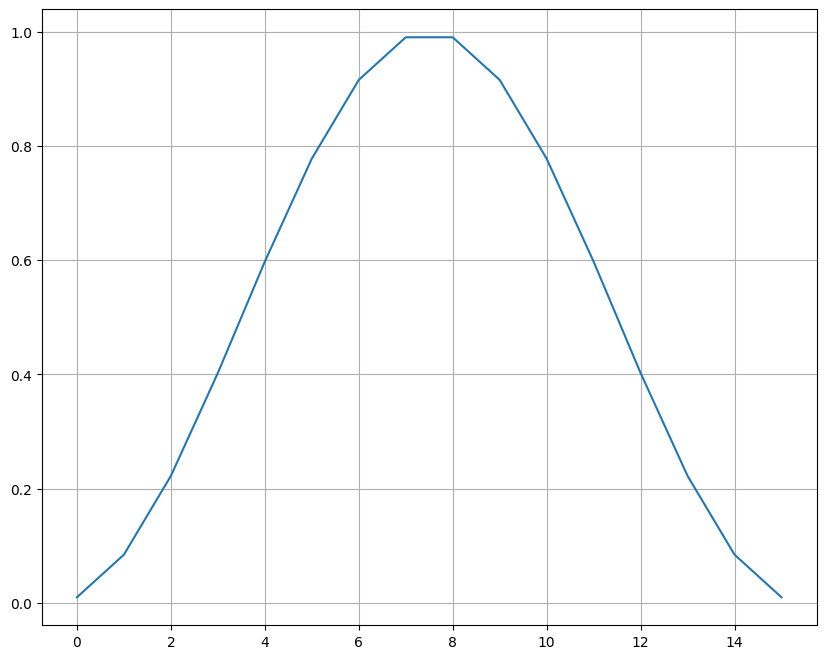

In [10]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()


Ini adalah contoh dari Raise Cosine (Hanning) Window dengan panjang window genap dan L = 16, akan didapat window dengan plot seperti di atas.

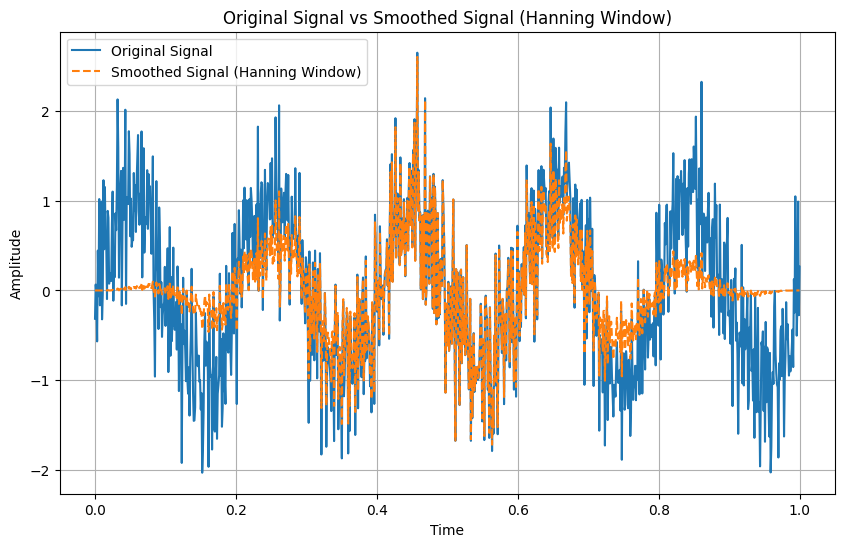

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, size=t.shape)

window = np.hanning(len(signal))
smoothed_signal = signal * window

plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Hanning Window)', linestyle='--')
plt.title('Original Signal vs Smoothed Signal (Hanning Window)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Jenis umum lainnya adalah **Hanning window**. Hanning window sering digunakan untuk untuk mengurangi efek leakage spektral dan meningkatkan akurasi analisis frekuensi. Hanning window secara matematis didefinisikan sebagai:

𝑤[𝑛] = 0.5 – 0.5 cos (2π𝑛/(𝑁-1))

di mana 𝑤[𝑛] adalah nilai dari Hanning window pada indeks ke-𝑛 dan 𝑁 adalah panjang window.

**Kelebihan Hanning Window:**

- Reduksi Leakage Spektral: Hanning window dirancang untuk mengurangi efek leakage spektral, yang terjadi ketika energi sinyal bocor ke frekuensi lain selain frekuensi utama yang diamati. Ini membantu meningkatkan akurasi dalam analisis frekuensi.

- Roll-off yang Baik: Hanning window memiliki roll-off yang baik, yang berarti bahwa penurunan amplitudo dari puncak ke sisi lobenya relatif lambat. Hal ini memungkinkan untuk mengurangi efek side lobe tanpa mengorbankan resolusi frekuensi secara signifikan.

**Kekurangan Hanning Window:**

- Sisi-Lobing: Meskipun Hanning window memiliki roll-off yang baik, sisi lobenya masih terlihat, meskipun pada tingkat yang lebih rendah daripada window sederhana seperti rectangular window. Sisi lobing dapat mengganggu dalam beberapa aplikasi pemrosesan sinyal, terutama jika presisi tinggi diperlukan.

- Lebar Main Lobe: Hanning window memiliki lebar main lobe yang lebih besar daripada beberapa window lainnya, seperti Kaiser window. Ini dapat mempengaruhi resolusi frekuensi dalam analisis sinyal yang memerlukan detil yang lebih tinggi.

Meskipun memiliki beberapa kelemahan, Hanning window sering digunakan dalam berbagai aplikasi pemrosesan sinyal karena keseimbangan yang baik antara reduksi leakage spektral dan roll-off yang baik.


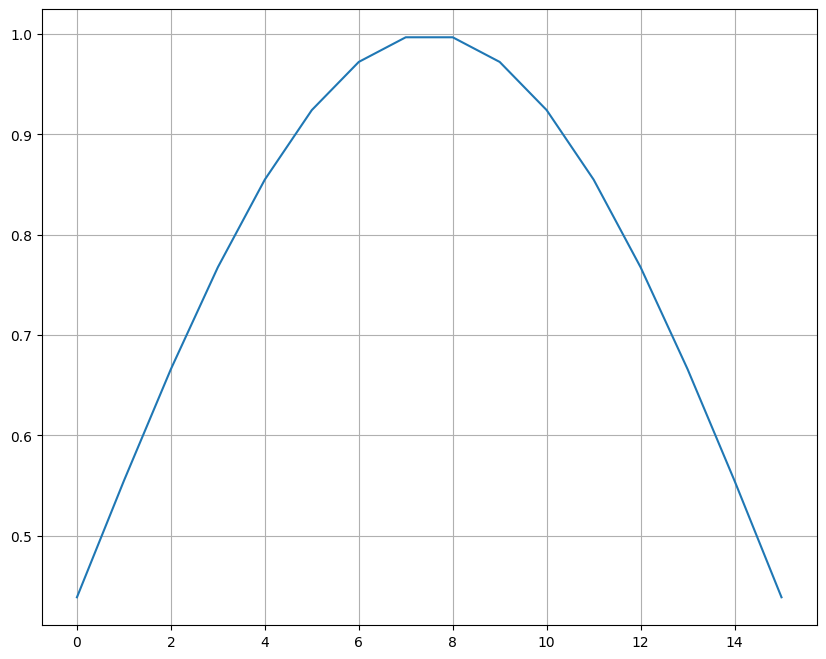

In [11]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()


Plot Kaiser Window dengan parameter L = 16 dan β = 2 seperti diatas.

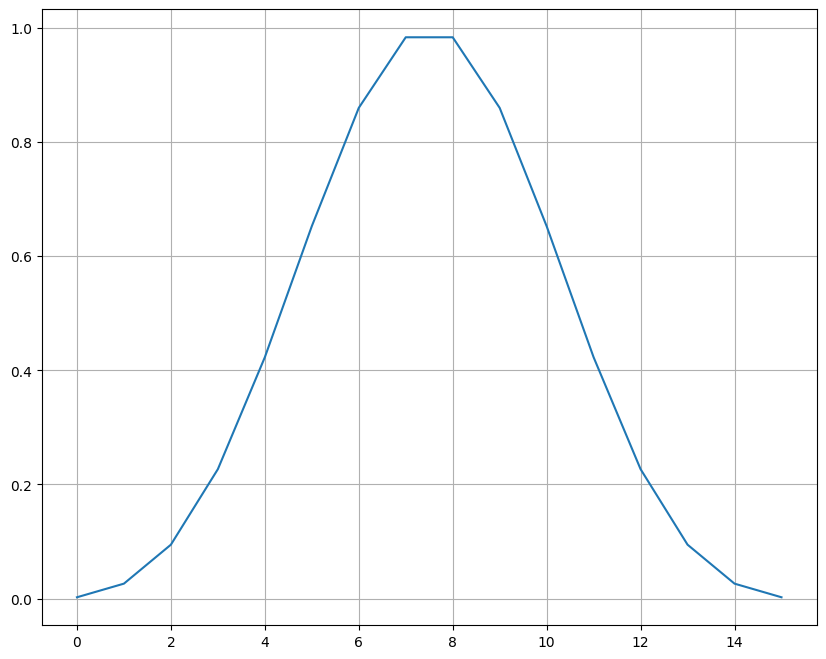

In [12]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()


Plot Kaiser Window dengan parameter L = 16 dan β = 8 seperti diatas.

<ipython-input-15-1b69bc586efa>:14: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  window = kaiser(window_length, beta)


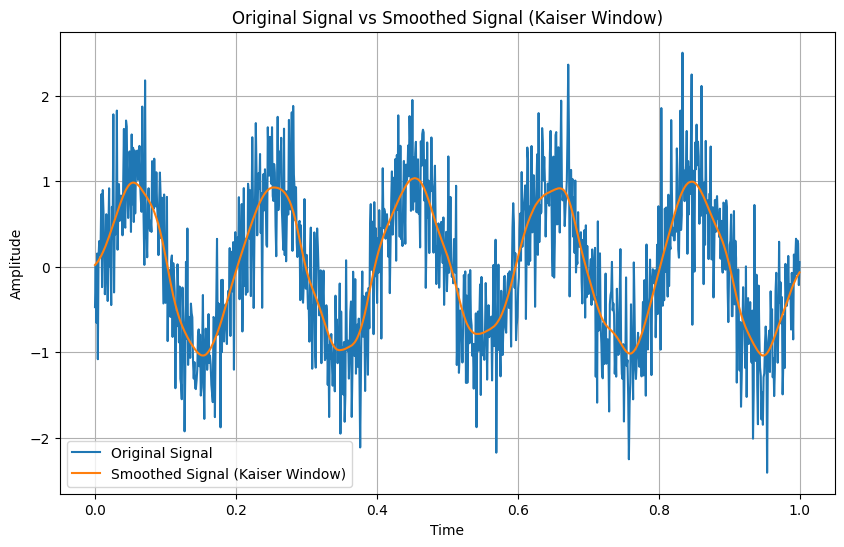

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiser

# Generate a noisy signal
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, size=t.shape)

# Define Kaiser window parameters
beta = 5  # Beta parameter for Kaiser window
window_length = 51

# Generate Kaiser window
window = kaiser(window_length, beta)

# Apply Kaiser window to the signal
smoothed_signal = np.convolve(signal, window, mode='same') / np.sum(window)

# Plot original and smoothed signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Kaiser Window)')
plt.title('Original Signal vs Smoothed Signal (Kaiser Window)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

**Kaiser Window** memiliki fungsi yang fungsi yang hampir sama dengan hanning window yaitu untuk mengurangi efek leakage spektral dan meningkatkan akurasi analisis frekuensi.

Namun, Kaiser Window memiliki lebih banyak kontrol dibandingkan Hanning Window seperti penggunaan parameter β untuk mengatur bentuk Window, yang mana memungkinkan pengguna untuk menyesuaikan antara resolusi frekuensi dan level side lobe.

Untuk kelebihan Kaiser Window sama seperti Hanning Window dengan efektivitas dan fleksibilitas yang lebih bagus. Namun hal tersebut juga dipengaruhi oleh kontrol parameter yang harus cermat.

3 Jenis Window tersebut adalah Window yang paling umum digunakan dalam dunia pengolahan sinyal digital. Ada jenis-jenis Window lainnya seperti Blackman Window, Triangular Window, Tukey Window, dll. Namun pada dasarnya fungsi Window adalah untuk membantu membatasi efek pembatasan sinyal (seperti aliasing) atau memperbaiki akurasi hasil analisis, transformasi, atau proses filter.